<a href="https://colab.research.google.com/github/godaebbang/goaiffel-quest/blob/main/01_%5BGoProjects%5D_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. 데이터 가져오기**
* `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
* `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [ ]:
# 관련 라이브러리 불러오기
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져오기
diabetes = load_diabetes()

In [ ]:
# diabetes의 data를 df_X에 가져오기
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# diabetes의 target를 df_y에 가져오기
df_y = pd.Series(diabetes.target)

**속성**
수치 예측 값, 평균이 0이고 제곱 길이가 1이 되도록 표준화

**타겟**
기준 시점 1년 후 질병 진행의 정량적 측정값

**속성 정보**
1. **age**: 연령 (년 단위)
2. **sex**: 성별
3. **BMI**: 체질량 지수
4. **BP**: 평균 혈압
5. **s1**: 총 혈청 콜레스테롤
6. **s2**: 저밀도 지단백질
7. **s3**: 고밀도 지단백질
8. **s4**: 총 콜레스테롤 / HDL
9. **s5**: 혈청 트리글리세리드 수치의 로그
9. **s6**: 혈당 수치

In [ ]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

In [ ]:
# df_X, df_y의 형태 살펴보기
df_X.shape, df_y.shape

((442, 10), (442,))

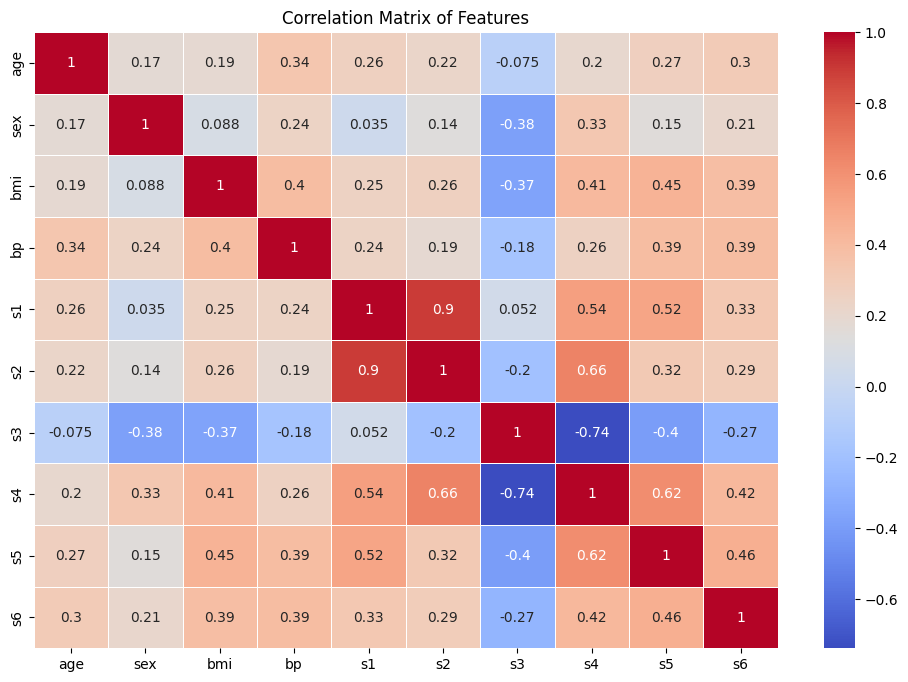

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [ ]:
# 상관관계 행렬 살펴보기
correlation_matrix = df_X.corr()

# 상관관계 시각화하기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

correlation_matrix

### **2. 모델에 입력할 데이터 `X` 준비하기**
* `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
# df_X에 있는 값들을 numpy array로 변환해서 저장하기
X = df_X.to_numpy()

### **3. 모델에 입력할 데이터 `y` 준비하기**
* `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
# df_y에 있는 값들을 numpy array로 변환해서 저장하기
y = df_y.to_numpy()

### **4. train 데이터와 test 데이터로 분류하기**

* `X`와 `y` 데이터를 각각 train 데이터와 test 데이터로 분류해주세요.

In [ ]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분류하기
# 80% 훈련용, 20% 테스트용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **5. 모델 준비하기**
* 입력 데이터 개수에 맞는 가중치 `w`와 `b`를 준비해주세요.
* 모델 함수를 구현해주세요.

In [ ]:
# 입력 데이터의 특성 수에 맞는 가중치 W와 편향치 b를 초기화
W = np.random.rand(X_train.shape[1])  # 특성 개수는 총 10개
b = np.random.rand()

In [ ]:
# 모델 함수 구현하기
# 선형 회귀 모델, 가중치와 편향치 사용 : y = X * W + b
def model(X, W, b):
    predictions = 0
    for i in range(X_train.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

"""
점곱을 사용한 선형 회귀 모델
def model(X, W, b):
  return np.dot(X, W) + b
"""

'\n점곱을 사용한 선형 회귀 모델\ndef model(X, W, b):\n  return np.dot(X, W) + b\n'

### **6. 손실함수 `loss` 정의하기**
* 손실함수를 `MSE` 함수로 정의해주세요.

In [ ]:
# MSE 손실 함수를 정의
def MSE(a, b):
    return np.mean((a - b) ** 2)

# 전체 손실을 계산하는 함수
# 모델의 예측값과 실제값의 MSE를 계산
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### **7. 기울기를 구하는 `gradient` 함수 구현하기**
* 기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [ ]:
# 가중치와 편향치에 대한 gradient 계산하기
def gradients(X, y, W, b):
    N = len(y)
    predictions = model(X, W, b)
    dW = -2/N * np.dot(X.T, (y - predictions))  # 가중치의 기울기
    db = -2/N * np.sum(y - predictions)  # 편향치의 기울기
    return dW, db

### **8. 하이퍼 파리미터인 학습률 설정하기**

* 학습률, learning rate 를 설정해주세요.
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [ ]:
# 하이퍼 파라미터인 학습률 설정하기
learning_rate = 0.01  # 학습률 설정
num_iterations = 100000 # 반복 횟수 설정

### **9. 모델 학습하기**

* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* `loss` 값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 `X` 에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [ ]:
# 모델 학습하기
losses = []  # 손실 값을 저장할 리스트

# 지정된 반복 횟수만큼 모델을 학습시키기
for i in range(num_iterations + 1):
    dW, db = gradients(X_train, y_train, W, b)  # 기울기 계산하기
    W -= learning_rate * dW  # 가중치 업데이트
    b -= learning_rate * db  # 편향치 업데이트
    current_loss = loss(X_train, W, b, y_train)  # 현재 손실 값 계산하기
    losses.append(current_loss)  # 손실 값 저장
    if i % 10000 == 0:
        print(f"Iteration {i}: Loss = {current_loss}")  # 50번마다 손실 값 출력하기

Iteration 0: Loss = 2888.7646407558427
Iteration 10000: Loss = 2888.5961037852653
Iteration 20000: Loss = 2888.428978057676
Iteration 30000: Loss = 2888.2632513525673
Iteration 40000: Loss = 2888.0989115818043
Iteration 50000: Loss = 2887.9359467864997
Iteration 60000: Loss = 2887.7743451340434
Iteration 70000: Loss = 2887.6140949152873
Iteration 80000: Loss = 2887.455184541875
Iteration 90000: Loss = 2887.297602543691
Iteration 100000: Loss = 2887.1413375664497


### **10. test 데이터에 대한 성능 확인하기**
* test 데이터에 대한 성능을 확인해주세요.

In [ ]:
# TEST에 대한 성능 확인하기(평가지수 MSE)
from sklearn.metrics import mean_squared_error

test_predictions = model(X_test, W, b)  # 테스트 데이터에 대한 예측값 계산
test_mse = MSE(test_predictions, y_test)  # 테스트 데이터에 대한 MSE 계산
print(f"Test MSE: {test_mse}")  # 테스트 MSE 출력

Test MSE: 2885.280945182746


### **11. 정답 데이터와 예측한 데이터 시각화하기**

* **x축**에는 **X 데이터의 첫 번째 컬럼**을, **y축**에는 정답인 **target 데이터**를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

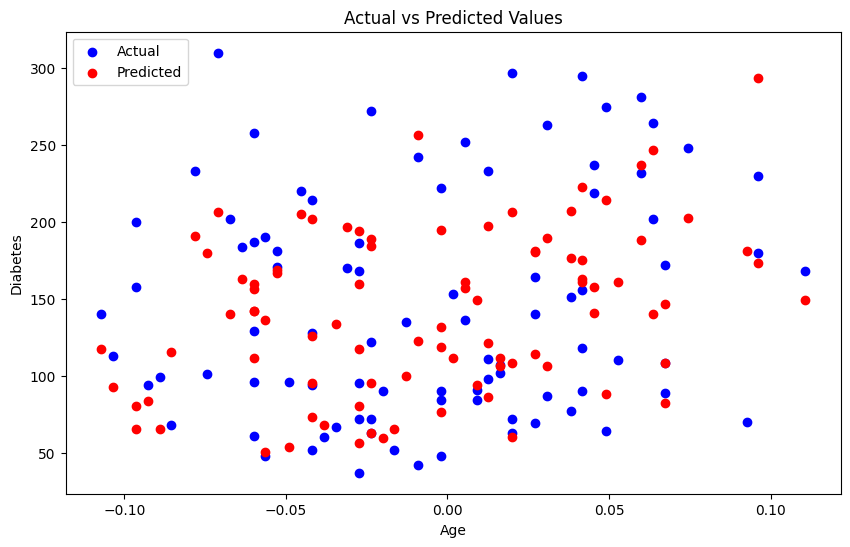

In [ ]:
# 데이터 시각화하기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')  # 실제 값을 파란색 점으로 표시
plt.scatter(X_test[:, 0], test_predictions, color='red', label='Predicted')  # 예측 값을 빨간색 점으로 표시
plt.xlabel('Age')  # x축 레이블 설정
plt.ylabel('Diabetes')  # y축 레이블 설정
plt.legend()  # 범례 표시
plt.title('Actual vs Predicted Values')  # 그래프 제목 설정
plt.show()  # 그래프 표시

**모델 개요**
1. **학습률(learning rate)** : 0.01 / 학습률에 따라서 MSE 차이가 심하게 났음

ex. 0.001, 0.0001, 0.0005 등 모두 MSE가 3000을 넘어섰음.

2. **반복 횟수(iteration)** : 100000
3. **변수 설정** : 모두 정규화된 파라미터였기에, 따로 정규화를 하지 않음. 또한 s1과 s2 간의 강한 상관관계가 있어서 하나를 제거했을 때, 유의미한 차이를

1. **모델의 예측 성능** : 그래프에서 파란색 점(실제 값)과 빨간색 점(예측 값)이 서로 가깝게 위치해 있기 때문에, 모델이 비교적 실제 값을 잘 예측하고 있음
2. **특정 특성과 타겟 간의 관계** : 두드러지는 않지만, 두 변수 간 양의 상관관계가 있음.(나이가 들수록, 당뇨병에 걸릴 확률이 높음)
3. **모델의 일반화 능력** : 실제 MSE는 2887, 예측 MSE는 2885로 비슷함. 따라서 모델이 잘 일반화되었다고 볼 수 있음.